# K MEANS CLUSTERING

### Import Necessary Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

### Understand the data

In [34]:
technical_df = pd.read_csv("technical_support_data.csv")
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
PROBLEM_TYPE             23 non-null object
no_of_cases              23 non-null int64
Avg_pending_calls        23 non-null float64
Avg_resol_time           23 non-null int64
recurrence_freq          23 non-null float64
Replace_percent          23 non-null float64
In_warranty_percent      23 non-null int64
Post_warranty_percent    23 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ KB


In [36]:
df.shape()

TypeError: 'tuple' object is not callable

In [37]:
df.shape

(23, 8)

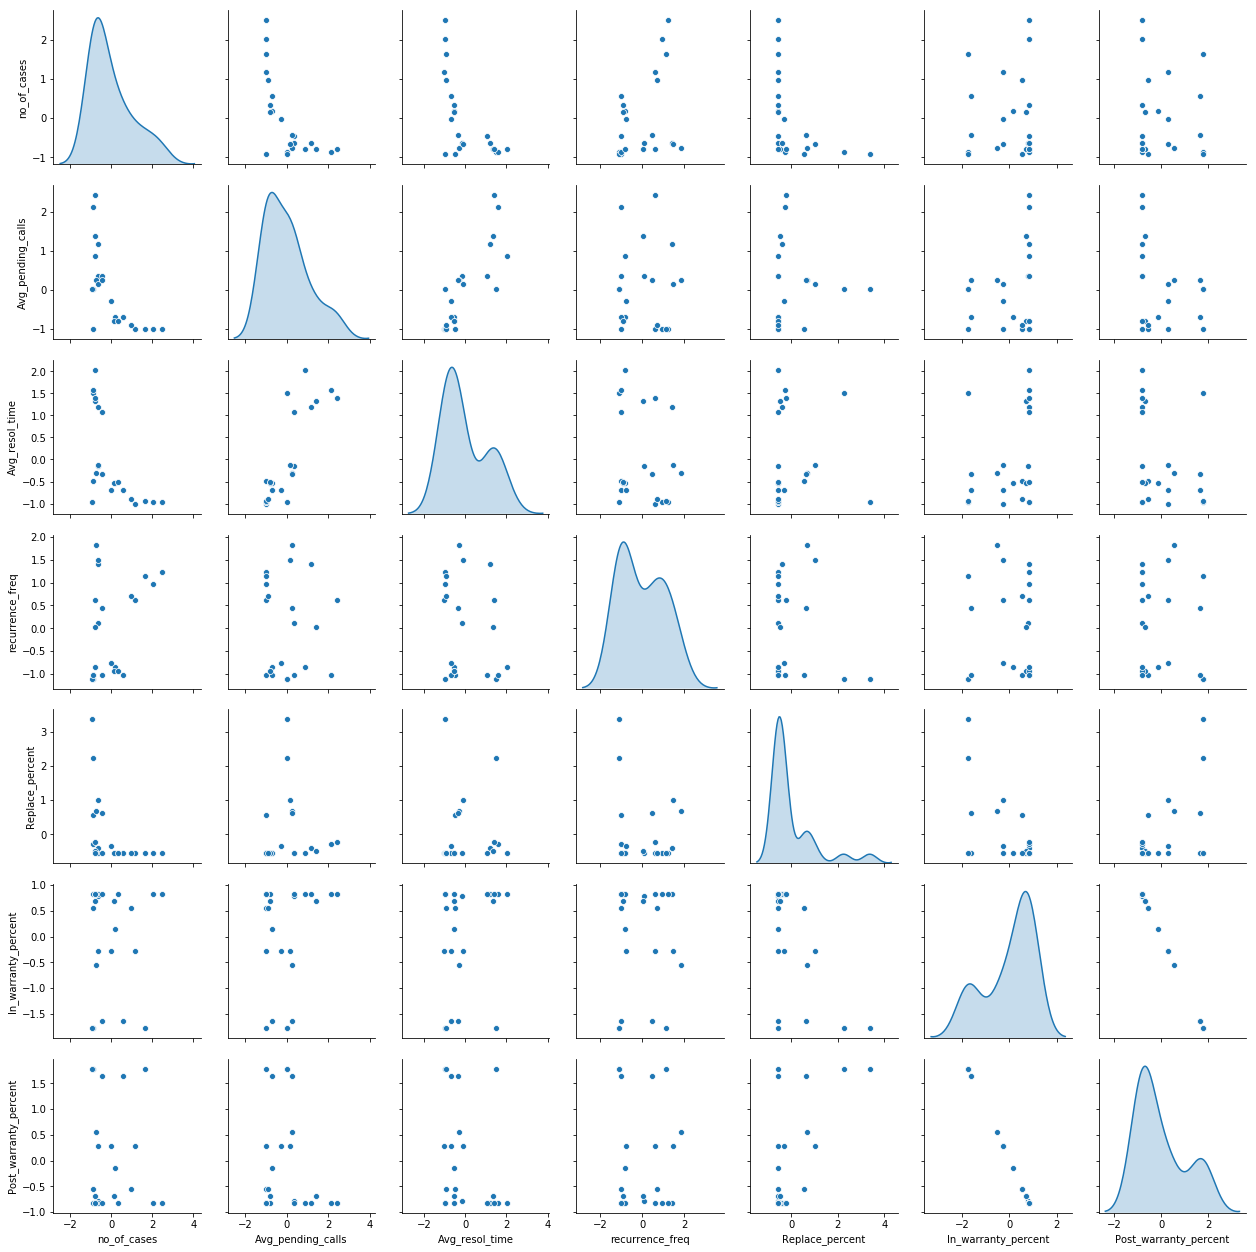

In [38]:
df_technical_attr = df.iloc[:,1:]
df_technical_scaled = df_attr.apply(zscore)
sns.pairplot(df_scaled,diag_kind='kde')

### Grouping Data into similar clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

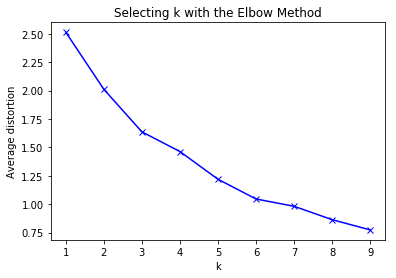

In [39]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_technical_scaled)
    prediction=model.predict(df_technical_scaled)
    meanDistortions.append(sum(np.min(cdist(df_technical_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_technical_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

let us look at 3 clusters and 5 clusters as we can see bends occurs from there

In [40]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(df_technical_scaled)
prediction=final_model.predict(df_technical_scaled)

#Append the prediction 
df_technical_attr["GROUP"] = prediction
df_technical_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_technical_attr.head()

Groups Assigned : 



,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,170,1.3,32,0.04,0.0,75,25,0
1,12,2.0,150,0.01,0.5,5,95,1
2,5,1.0,35,0.02,0.2,90,10,0
3,3,2.0,8,0.01,0.7,5,95,1
4,45,2.3,54,0.15,0.0,99,1,2


### Analyze the data

In [41]:
df_technical_cluster = df_technical_attr.groupby(['GROUP'])
df_technical_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
1,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
2,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1DDB7DD30>,
      dtype=object)

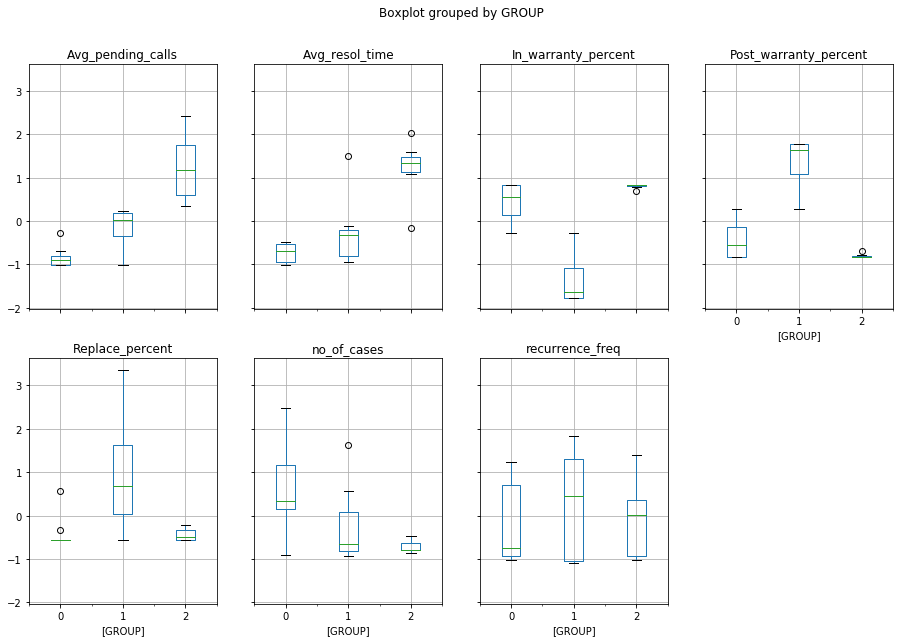

In [42]:
df_technical_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### k =5

In [43]:
from sklearn.cluster import KMeans
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(df_technical_scaled)
prediction=final_model.predict(df_technical_scaled)

#Append the prediction 
df_technical_attr["GROUP"] = prediction
df_technical_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_technical_attr.head()

Groups Assigned : 



,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,170,1.3,32,0.04,0.0,75,25,3
1,12,2.0,150,0.01,0.5,5,95,4
2,5,1.0,35,0.02,0.2,90,10,3
3,3,2.0,8,0.01,0.7,5,95,4
4,45,2.3,54,0.15,0.0,99,1,2


### Analyze the data

In [30]:
df_technical_cluster = df_technical_attr.groupby(['GROUP'])
df_technical_cluster.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
1,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
2,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
3,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
4,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1DA034828>,
      dtype=object)

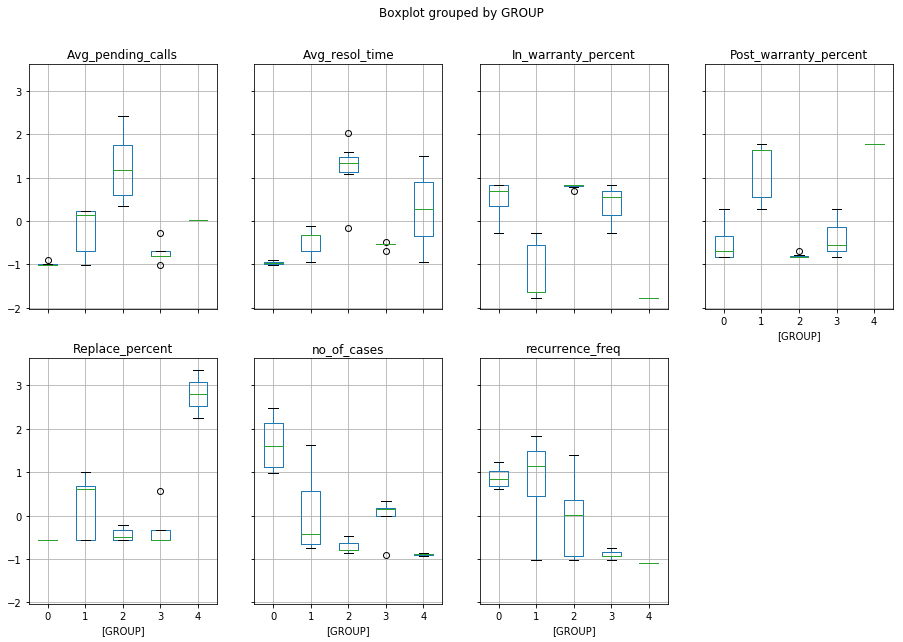

In [31]:
df_technical_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))